In [529]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 200),
            nn.Tanh(),
            nn.Linear(200, 200),
            nn.Tanh(),
            nn.Linear(200, 200),
            nn.Tanh(),
            nn.Linear(200, 1)
        )

    def forward(self, x):
        return self.stack(x)


def dx(f, wrt, n):
    for i in range(n):
        grads = torch.autograd.grad(f, wrt, create_graph=True)[0]
        f = grads.sum()
    return grads

def ode_loss(x, y):
    assert(x.shape == y.shape)
    dy = dx(torch.sum(y), x, 1)
    dy2 = dx(torch.sum(y), x, 2)

    # A = torch.linalg.norm(5*dy+2*x*y, ord=2)
    # A = torch.linalg.norm(dy2 + 5*dy + 4*y, ord=2)
    A = torch.linalg.norm(10*dy2 + 5*y, ord=2)
    return A

def bound_loss(y, x):
    return torch.linalg.norm(y)
    return torch.linalg.norm(y-1, ord=2)
    
def bound_loss2(y, x):
    dy = dx(torch.sum(y), x, 1)
    # print(dy[0])
    return torch.linalg.norm(dy-1, ord=2)
    return torch.linalg.norm(dy+7, ord=2)


USigmoidng cuda device


In [586]:
model = NN()
model = model
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

k = 1
alph = 1
beta = 500

0 7908.5126953125 3.368704080581665 0.0007591024041175842 15.810286521911621
500 7902.02587890625 8.167228698730469 0.02271357923746109 15.78767204284668
1000 7900.1982421875 6.961866855621338 0.02115340530872345 15.786430358886719
1500 7898.91943359375 6.64803409576416 0.0569223128259182 15.784428596496582
2000 7898.14013671875 6.482636451721191 0.1307419389486313 15.783053398132324
2500 7893.29931640625 2.9973628520965576 0.08500027656555176 15.780433654785156
3000 7893.0087890625 2.9820430278778076 0.0004771314561367035 15.78005313873291
3500 7891.99658203125 2.0025134086608887 0.033164940774440765 15.779921531677246
4000 7891.181640625 1.2430654764175415 0.0038452334702014923 15.779869079589844
4500 7891.67236328125 1.7093273401260376 0.03441980108618736 15.779857635498047
5000 7890.96044921875 1.0591429471969604 0.003119751811027527 15.77979564666748
5500 7891.3349609375 1.4216384887695312 0.0004177764058113098 15.779826164245605
6000 7891.18310546875 1.2835325002670288 0.00053148

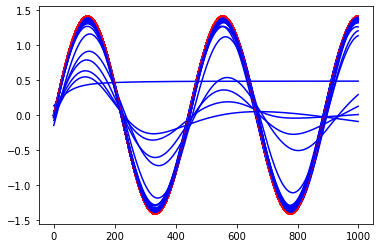

In [587]:
N = 250
X = torch.linspace(0, 20, N, requires_grad=True).reshape(N, 1)
X_test = torch.linspace(0, 20, 1000).reshape(1000, 1)
x = np.linspace(0, 20, 1000)

for e in range(0, 50000):
    optimizer.zero_grad()
    output = model(X)
    loss1 = ode_loss(X, output)
    output = model(X[0])
    # print(output)
    loss2 = bound_loss(output, X)
    loss3 = bound_loss2(output, X)
    loss = k*loss1 + alph*loss2 + beta*loss3
    loss.backward()
    optimizer.step()
    if e % 500 == 0:
        plt.plot(np.sqrt(2)*np.sin(x/np.sqrt(2)), color='r')
        plt.plot(model(X_test).detach(), color='b')
        print(e, loss.item(), loss1.item(), loss2.item(), loss3.item())

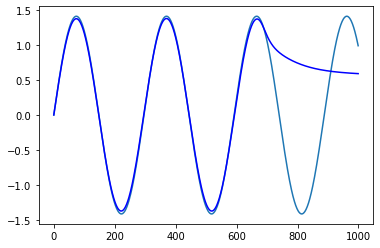

In [612]:
x = np.linspace(0, 30, 1000)
X_test = torch.linspace(0, 30, 1000).reshape(1000, 1)

# plt.plot(-np.exp(-x) + 2*np.exp(-4*x))
# plt.plot(1/9 * np.exp(-x/4) * (np.sqrt(15) * np.sin(3/4 * np.sqrt(3/5) * x) + 9 * np.cos(3/4 * np.sqrt(3/5) * x)))

plt.plot(np.sqrt(2)*np.sin(x/np.sqrt(2)))
plt.plot(model(X_test).detach(), color='b')

In [614]:
import pygame

pygame.init()
window = pygame.display.set_mode([800,600],pygame.RESIZABLE)
clock = pygame.time.Clock()
game_running = True 


x = 0
while game_running :
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            print("closing the game")
            game_running = False
            break
    window.fill((0, 0, 0))
    # print(model(torch.Tensor([x])).item())
    pygame.draw.circle(window, (255, 255, 255), (500 + 100*model(torch.Tensor([x])).item(), 100), 10)
    pygame.display.update()
    x+=.001


pygame.quit()

closing the game
